In [77]:
import pandas as pd
import plotly.graph_objects as go
import math
import numpy as np
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional

In [79]:
df = pd.read_csv('data.csv')

In [81]:
df.head(1000)

,index,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
0,21628,2013-12-15,24,0.08385,0.13560,0.04350,0.04470,0.00,1940697.00,0.012987,0.0
1,21629,2013-12-16,24,0.04485,0.12990,0.02250,0.03075,0.00,1493994.15,0.076723,0.0
2,21630,2013-12-17,24,0.03105,0.04335,0.01740,0.04035,0.00,2147991.12,0.883516,0.0
3,21631,2013-12-18,24,0.04005,0.05430,0.03075,0.05430,0.00,3157053.57,0.999000,0.0
4,21632,2013-12-19,24,0.05925,0.22800,0.04920,0.17430,0.00,11038835.61,0.699000,0.0
...,...,...,...,...,...,...,...,...,...,...,...
995,22623,2016-09-05,24,0.03525,0.03585,0.03495,0.03540,252109.44,24769662.39,0.499500,0.0
996,22624,2016-09-06,24,0.03570,0.03630,0.03525,0.03615,197052.57,25252187.40,0.856243,0.0
997,22625,2016-09-07,24,0.03615,0.03690,0.03570,0.03630,211063.05,25381394.28,0.499500,0.0
998,22626,2016-09-08,24,0.03630,0.03690,0.03420,0.03420,138361.41,23912419.41,0.000000,0.0


In [83]:
#проверяем пустые значения
missing_values = df.isnull().sum()

print(missing_values)

index          0
date           0
ranknow        0
open           0
high           0
low            0
close          0
volume         0
market         0
close_ratio    0
spread         0
dtype: int64


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1801 entries, 0 to 1800
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        1801 non-null   int64  
 1   date         1801 non-null   object 
 2   ranknow      1801 non-null   int64  
 3   open         1801 non-null   float64
 4   high         1801 non-null   float64
 5   low          1801 non-null   float64
 6   close        1801 non-null   float64
 7   volume       1801 non-null   float64
 8   market       1801 non-null   float64
 9   close_ratio  1801 non-null   float64
 10  spread       1801 non-null   float64
dtypes: float64(8), int64(2), object(1)
memory usage: 154.9+ KB


In [87]:
zero_count = (df == 0.00).sum()

print(zero_count)

index             0
date              0
ranknow           0
open              0
high              0
low               0
close             0
volume           12
market            0
close_ratio      81
spread         1801
dtype: int64


In [89]:
selected_columns = df.iloc[:, 3:10] 
selected_columns.head()

,open,high,low,close,volume,market,close_ratio
0,0.08385,0.13560,0.04350,0.04470,0.0,1940697.00,0.012987
1,0.04485,0.12990,0.02250,0.03075,0.0,1493994.15,0.076723
2,0.03105,0.04335,0.01740,0.04035,0.0,2147991.12,0.883516
3,0.04005,0.05430,0.03075,0.05430,0.0,3157053.57,0.999000
4,0.05925,0.22800,0.04920,0.17430,0.0,11038835.61,0.699000


In [91]:
#решил проверить матрицу корреляции в результатох нет ничего удивительного
correlation_matrix = selected_columns.corr()
print(correlation_matrix)

                 open      high       low     close    volume    market  \
open         1.000000  0.995489  0.995496  0.992923  0.715600  0.990597   
high         0.995489  1.000000  0.993715  0.997379  0.760269  0.993958   
low          0.995496  0.993715  1.000000  0.996149  0.707795  0.994534   
close        0.992923  0.997379  0.996149  1.000000  0.746501  0.997352   
volume       0.715600  0.760269  0.707795  0.746501  1.000000  0.742167   
market       0.990597  0.993958  0.994534  0.997352  0.742167  1.000000   
close_ratio  0.003927  0.021479  0.016748  0.043515  0.065763  0.044327   

             close_ratio  
open            0.003927  
high            0.021479  
low             0.016748  
close           0.043515  
volume          0.065763  
market          0.044327  
close_ratio     1.000000  


In [93]:
#используется для преобразования столбца date в тип данных datetime для корректной работы
df["date"] = pd.to_datetime(df["date"])

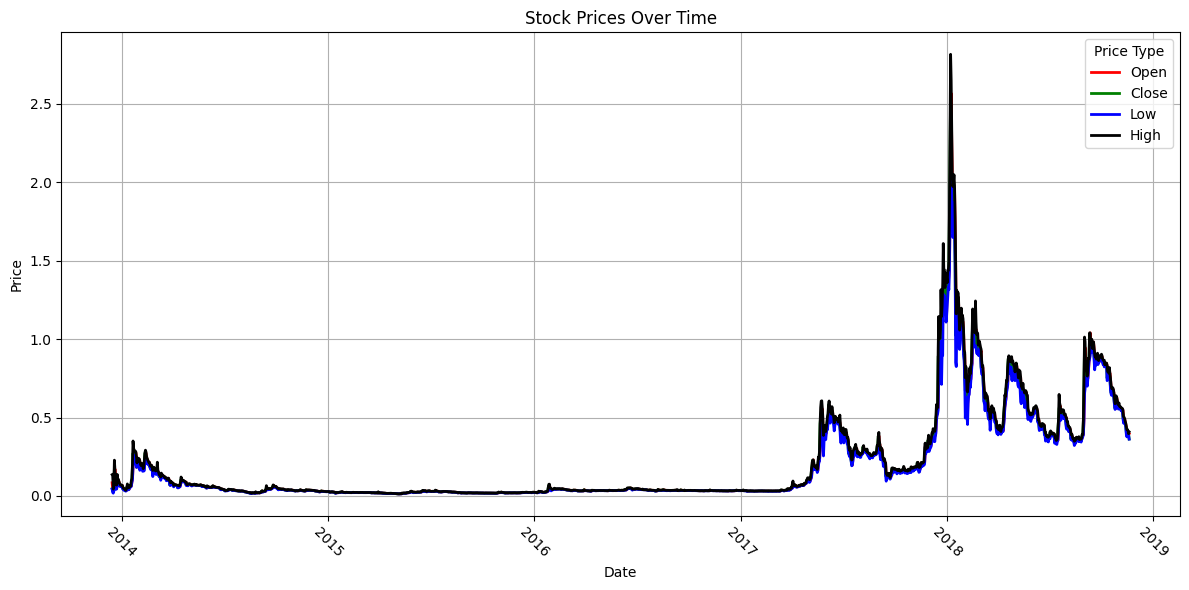

In [95]:
#ресуем график цен
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.plot(df['date'], df['open'], label='Open', color='red', linewidth=2)
plt.plot(df['date'], df['close'], label='Close', color='green', linewidth=2)
plt.plot(df['date'], df['low'], label='Low', color='blue', linewidth=2)
plt.plot(df['date'], df['high'], label='High', color='black', linewidth=2)

plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=-45)
plt.legend(title='Price Type')
plt.grid()

plt.tight_layout()  
plt.show()

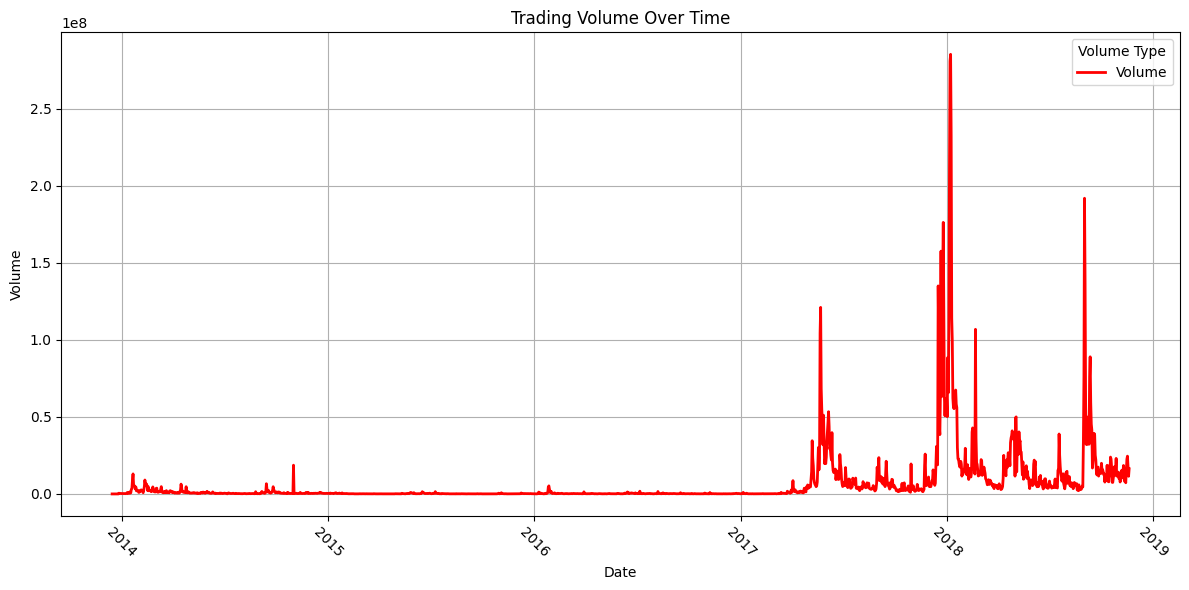

In [96]:
# посмотрим еще на объем торгов
plt.figure(figsize=(12, 6))

plt.plot(df['date'], df['volume'], label='Volume', color='red', linewidth=2)

plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.xticks(rotation=-45)
plt.legend(title='Volume Type')
plt.grid()

plt.tight_layout() 
plt.show()

In [98]:
#функции для расчета метрик
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def return_rmse(test, predicted):
    """Вычисляет и выводит RMSE."""
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("Корень из среднеквадратичной ошибки (RMSE): {:.4f}".format(rmse))
    return rmse

def return_mae(test, predicted):
    """Вычисляет и выводит MAE."""
    mae = mean_absolute_error(test, predicted)
    print("Средняя абсолютная ошибка (MAE): {:.4f}".format(mae))
    return mae

def return_r2(test, predicted):
    """Вычисляет и выводит R²."""
    r2 = r2_score(test, predicted)
    print("Коэффициент детерминации (R²): {:.4f}".format(r2))
    return r2

In [101]:
# поделим выборку на тестовые и тренеровочные данные
train = df[df['date'] <= '2017-12-01'].iloc[:,3:4].values
test = df[df['date'] > '2017-12-01'].iloc[:,3:4].values

In [103]:
print(test.shape[0] / train.shape[0])#в таком процентом соотношении поделили выборку

0.24378453038674033


In [105]:
from sklearn.preprocessing import MinMaxScaler
#нормализуем данные
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train)

In [107]:
#в 2ух чанках делаем датасет где временной ряд берем 60
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

In [109]:
time_step = 60
X_train, y_train = create_dataset(train_scaled, time_step)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

In [111]:
def prepare_and_predict(model, data, scaler, time_step):
    
    inputs = data["high"][len(data) - len(test) - time_step:].values
    inputs = inputs.reshape(-1, 1)
    inputs = scaler.transform(inputs)

    X_test = []
    for i in range(time_step, len(inputs)):
        X_test.append(inputs[i-time_step:i, 0])
    
    X_test = np.array(X_test)
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

    predicted_prices = model.predict(X_test)
    predicted_prices = scaler.inverse_transform(predicted_prices)

    return predicted_prices

In [113]:
from keras.models import Sequential
from keras.layers import LSTM, Dropout
#инцилизируем lstm и обучаем

regressor = Sequential()
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units=1))

regressor.compile(optimizer='rmsprop',loss='mean_squared_error')
regressor.fit(X_train,y_train,epochs=25,batch_size=32)

Epoch 1/50
44/44 [==============================] - 6s 53ms/step - loss: 0.0087
Epoch 2/50
44/44 [==============================] - 2s 54ms/step - loss: 0.0047
Epoch 3/50
44/44 [==============================] - 2s 54ms/step - loss: 0.0042
Epoch 4/50
44/44 [==============================] - 2s 54ms/step - loss: 0.0040
Epoch 5/50
44/44 [==============================] - 2s 55ms/step - loss: 0.0037
Epoch 6/50
44/44 [==============================] - 2s 56ms/step - loss: 0.0034
Epoch 7/50
44/44 [==============================] - 2s 55ms/step - loss: 0.0032
Epoch 8/50
44/44 [==============================] - 2s 55ms/step - loss: 0.0032
Epoch 9/50
44/44 [==============================] - 2s 56ms/step - loss: 0.0030
Epoch 10/50
44/44 [==============================] - 3s 64ms/step - loss: 0.0031
Epoch 11/50
44/44 [==============================] - 3s 62ms/step - loss: 0.0030
Epoch 12/50
44/44 [==============================] - 3s 63ms/step - loss: 0.0028
Epoch 13/50
44/44 [==================

In [114]:
predicted_prices = prepare_and_predict(regressor, df, scaler, time_step)
rmse_value = return_rmse(test, predicted_prices)
mae_value = return_mae(test, predicted_prices)
r2_value = return_r2(test, predicted_prices)
#R2 метрика 0.38 что счетаеться неплохо но требуется улучшения да и RMSE MAE для наших данных большевато

12/12 [==============================] - 1s 19ms/step
Корень из среднеквадратичной ошибки (RMSE): 0.2690
Средняя абсолютная ошибка (MAE): 0.1801
Коэффициент детерминации (R²): 0.3836


In [ ]:
import pickle
with open('lstm_model.pkl', 'wb') as file:
    pickle.dump(regressor, file)


In [131]:
#попробуем улуччшить модель 
#тк до 2017-04-01 обем продаж был маловат я решил попробывать обрезать выборку и обучить на таких данных
df = df[df['date'] >= '2017-04-01']

In [133]:
df.head()

,index,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
1203,22831,2017-04-01,24,0.04995,0.05235,0.04755,0.05025,1019977.2,36097072.11,0.561937,0.0
1204,22832,2017-04-02,24,0.05040,0.07905,0.04920,0.07335,4234121.1,52705393.29,0.808191,0.0
1205,22833,2017-04-03,24,0.07350,0.09495,0.06075,0.06405,8617435.2,46008685.80,0.096404,0.0
1206,22834,2017-04-04,24,0.06480,0.07350,0.06135,0.06480,3040280.1,46545986.52,0.283716,0.0
1207,22835,2017-04-05,24,0.06570,0.06675,0.06330,0.06630,1679782.5,47577477.42,0.868730,0.0


In [135]:
# поделим выборку на тестовые и тренеровочные данные
train = df[df['date'] <= '2018-08-01'].iloc[:,3:4].values
test = df[df['date'] > '2018-08-01'].iloc[:,3:4].values

In [137]:
print(test.shape[0] / train.shape[0])#в таком процентом соотношении поделили выборку

0.22540983606557377


In [139]:
from sklearn.preprocessing import MinMaxScaler
#нормализуем данные
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train)

In [141]:
time_step = 60
X_train, y_train = create_dataset(train_scaled, time_step)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

In [143]:
from keras.models import Sequential
from keras.layers import LSTM, Dropout

regressor2 = Sequential()
regressor2.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor2.add(Dropout(0.2))
regressor2.add(LSTM(units=50, return_sequences=True))
regressor2.add(Dropout(0.2))
regressor2.add(LSTM(units=50, return_sequences=True))
regressor2.add(Dropout(0.2))
regressor2.add(LSTM(units=50))
regressor2.add(Dropout(0.2))
regressor2.add(Dense(units=1))

regressor2.compile(optimizer='rmsprop',loss='mean_squared_error')
regressor2.fit(X_train,y_train,epochs=50,batch_size=32)

Epoch 1/50
14/14 [==============================] - 5s 53ms/step - loss: 0.0181
Epoch 2/50
14/14 [==============================] - 1s 53ms/step - loss: 0.0135
Epoch 3/50
14/14 [==============================] - 1s 53ms/step - loss: 0.0115
Epoch 4/50
14/14 [==============================] - 1s 54ms/step - loss: 0.0096
Epoch 5/50
14/14 [==============================] - 1s 53ms/step - loss: 0.0092
Epoch 6/50
14/14 [==============================] - 1s 53ms/step - loss: 0.0084
Epoch 7/50
14/14 [==============================] - 1s 53ms/step - loss: 0.0078
Epoch 8/50
14/14 [==============================] - 1s 53ms/step - loss: 0.0066
Epoch 9/50
14/14 [==============================] - 1s 53ms/step - loss: 0.0075
Epoch 10/50
14/14 [==============================] - 1s 54ms/step - loss: 0.0067
Epoch 11/50
14/14 [==============================] - 1s 57ms/step - loss: 0.0059
Epoch 12/50
14/14 [==============================] - 1s 54ms/step - loss: 0.0052
Epoch 13/50
14/14 [==================

In [149]:
predicted_prices = prepare_and_predict(regressor2, df, scaler, time_step)
rmse_value = return_rmse(test, predicted_prices)
mae_value = return_mae(test, predicted_prices)
r2_value = return_r2(test, predicted_prices)

4/4 [==============================] - 0s 16ms/step
Корень из среднеквадратичной ошибки (RMSE): 0.0832
Средняя абсолютная ошибка (MAE): 0.0625
Коэффициент детерминации (R²): 0.8463


In [151]:
import pickle
with open('lstm_model2.pkl', 'wb') as file:
    pickle.dump(regressor, file)


In [153]:
#когда мы так сказать обработали данные модель стала точнее работать 
#можно было бы еще обучить gru но насколько я знаю она менее точно работает чем lstm

In [155]:
#делаем предскозания лучшей моделью на 10 дней вперед
n_days = 10
df=pd.read_csv('data.csv')
df["date"] = pd.to_datetime(df["date"])
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(df['open'].values.reshape(-1, 1))

def predict_future(model, data, time_step, n_days):
    last_values = data[-time_step:].reshape(1, time_step, 1)
    predictions = []

    for _ in range(n_days):
        next_pred = model.predict(last_values)
        predictions.append(next_pred[0, 0])

        last_values = np.append(last_values[:, 1:, :], next_pred.reshape(1, 1, 1), axis=1)

    predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))
    return predictions
    
future_predictions = predict_future(regressor2, data_scaled, time_step, n_days)

predicted_dates = pd.date_range(start=df['date'].iloc[-1] + pd.Timedelta(days=1), periods=n_days)
predicted_df = pd.DataFrame(data=future_predictions, index=predicted_dates, columns=['Predicted'])

print(predicted_df)

1/1 [==============================] - 0s 20ms/step
            Predicted
2018-11-20   0.447666
2018-11-21   0.438744
2018-11-22   0.434651
2018-11-23   0.435107
2018-11-24   0.439050
2018-11-25   0.445271
2018-11-26   0.452788
2018-11-27   0.460962
2018-11-28   0.469450
2018-11-29   0.478105
